In [49]:
import numpy as np
import pandas as pd
import networkx as nx
import datetime
from datetime import date
import random
import matplotlib.pyplot as plt

from parser import parse_2018_groups
from df_to_graph import graph_from_2018

In [50]:
df = parse_2018_groups('./Cayo-Maria-master/Data All Cleaned/BehavioralDataFiles/GroupV2018_scansamples_FULL_CLEANED.csv')

df.date = df.date.map(lambda x : date(int(x.split("/")[2]), 
                                                 int(x.split("/")[0]), 
                                                 int(x.split("/")[1])))

df = df.sort_values("date")

df_by_date = [df[df.date == cur_date] for cur_date in df.date.value_counts().index]

### What dates to use?
 - For now: 2 ish weeks staring 2018-08-31 to 2018-08-31

In [51]:
x = df.date.value_counts().index.sort_values()

f = open('test.txt', 'w')
for v in range(len(x)):
    if v != 0: 
        f.write("Date: {}, Gap: {}\n".format(x[v], str(x[v] - x[v - 1])))
    else:
        f.write(str(x[v]) + "\n") 

f.close()

In [52]:
start_date = date(2018, 8, 14)
end_date = date(2018, 8, 31)
df_by_date = [d for d in df_by_date if d.date.iloc[0] >= start_date and d.date.iloc[0] <= end_date]
G_by_date = [graph_from_2018(d) for d in df_by_date]
for G in G_by_date:
    G.remove_edges_from(nx.selfloop_edges(G))
    nx.set_node_attributes(G, False, "infected")
    nx.set_node_attributes(G, False, "dropped")
    nx.set_node_attributes(G, 0, "dropped_countdown")
    nx.set_node_attributes(G, 0, "symptom_countdown")
    nx.set_node_attributes(G, False, "dead")

pog = G_by_date[0]

C:\Users\Ben Shapiro\OneDrive\MONKE\df_to_graph.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2018["in_prox"] = DF2018["prox_ids"].apply(lambda x : x.split(',') if type(x) == str else x)
C:\Users\Ben Shapiro\OneDrive\MONKE\df_to_graph.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2018["in_prox"] = DF2018["prox_ids"].apply(lambda x : x.split(',') if type(x) == str else x)
C:\Users\Ben Shapiro\OneDrive\MONKE\df_to_graph.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [78]:
code_to_bhv = {
    'R' : 'Rest',
    'F' : 'Feed',
    'T' : 'Travel',
    'G' : 'Social',
    'SD' : 'SDB', #Self-directed behavior - self-scratching, self-grooming, self-touching, body shaking
    'E' : 'Social',
    'D' : 'Drink',
    'AG' : 'Aggression',
    'P' : 'Rest',
    'AR' : 'Aggression',
    'SR' : 'Submit',
    'SG' : 'Submit',
    'AD' : 'XD',
    'SF' : 'XD',
    'R' : 'Rest',
    'G,E' : 'Social'
}

bhv_to_code = {value : key for key, value in code_to_bhv.items()}


#TODO: Make it so no repeat infections, visualize root
def infect(lst_of_graphs, lst_of_dfs, prox_pass_chance, symptom_chance, time_til_drop,
           death_chance, recovery_time, immunity = True, num_steps=20, root=None):
    '''
    Inputs:
    lst_of_graphs: List of nx temporal graphs ordered by timestep
    lst_of_dfs: List of uh dataframes KEKW
    social_pass_chance: Chance of passing disease to target monkey who socialized
    prox_pass_chance: Chance of passing disease to target monkey in general proximity
    symptom_chance: Chacne that monkey breaks out in symptoms
    time_til_drop: Time until a symptomatic monkey is dropped, whether due to death or just sickenss
    death_chance: monke die
    recovery_time: Number of timesteps it takes for a monkey to return to a social network #TODO: Make it a distribution
    immunity: Whether a monkey is immune after getting the disease
    num_steps: Number of time steps to go through before returning
    root: If not None will use given id as root, otherwise will start with random
    
    Returns: List of graphs, each with nodes that were infected at each timestep
    '''
    out_graphs = []
    current_data = {}
    
    for g in out_graphs:
        for node in g.nodes():
            if node not in current_data:
                current_data[node] = {
                    'infected' : False,
                    'dropped': False,
                    'dropped_countdown' : 0,
                    'symptom_countdown' : 0,
                    'immune' : False,
                    'keystone' : False
                }
            
    
    for graph in out_graphs:
        for node in 
    
    root = root
    
    if root == None:
        root = list(lst_of_graphs[0].nodes)[random.randrange(0, len(list(lst_of_graphs[0].nodes)))]
    
    
    #find a node that has connections lol
    while(len(lst_of_graphs[0][root]) == 0):
        root = list(lst_of_graphs[0].nodes)[random.randrange(0, len(list(lst_of_graphs[0].nodes)))]
    
    lst_of_graphs[0].nodes[root]['infected'] = True
    
    lst_of_graphs[0].nodes[root]['symptom_countdown'] = max(time_til_drop, 3) 
    #hardcoded min 3 days for first monkey so he can spread a little
        
    
    def transfer_infection(g1, g2):
        #Transfers infections from G1 to G2
        for node in g1.nodes:
            if node in g2:
                g2.nodes[node]['infected'] = g1.nodes[node]['infected']
                g2.nodes[node]['dropped'] = g1.nodes[node]['dropped']
                g2.nodes[node]['symptom_countdown'] = g1.nodes[node]['symptom_countdown']
                g2.nodes[node]['dropped_countdown'] = g1.nodes[node]['dropped_countdown']
                g2.nodes[node]['dead'] = g1.nodes[node]['dead']
                
        return g2
    
    def spread(G):
        vvs = [n for n, v in G.nodes(data = True) if v['infected'] == True and 
               v['dead'] == False and 
               v['dropped'] == False]
        
        for vv in vvs:
            for neighbor in G[vv]:
                #Calculate weighted chance of infection
                chance = 1 - (1 - prox_pass_chance) ** G[vv][neighbor]['weight']
                
                if random.uniform(0, 1) < chance and G.nodes()[neighbor]["immune"] == False:
                    G.nodes[neighbor]['infected'] = True
                    G.nodes[neighbor]['symptom_countdown'] = time_til_drop
            
            #Updating symptomatic monke
            G.nodes[vv]['symptom_countdown'] -= 1
            
            if G.nodes[vv]['symptom_countdown'] == 0:
                if random.uniform(0, 1) < symptom_chance:
                    if random.uniform(0, 1) < death_chance:
                        G.nodes[vv]['dead'] = True # :(
                    else:
                        G.nodes[vv]['dropped'] = True
                        G.nodes[vv]['dropped_countdown'] = time_til_drop
                else:
                    G.nodes[vv]['infected'] = False 
        
        dropped = [n for n, v in G.nodes(data = True) if v['dropped'] == True]
        
        for node in dropped:
            G.nodes[node]['dropped_countdown'] -= 1
            if G.nodes[node]['dropped_countdown']  == 0:
                G.nodes[node]['dropped'] = False
                G.nodes[node]['infected'] = False #Recovery!
                G.nodes[node]['immune'] = True
            
        return G

    
    for t in range(num_steps):
        current_graph = lst_of_graphs[t % 13].copy()
        #current_df = lst_of_graphs[t % 13]
        
        if t != 0:
            last_graph = out_graphs[t - 1]
            transfer_infection(last_graph, current_graph)
            
        out_graphs.append(spread(current_graph))
        
        #print([n for n in current_graph.nodes(data = True) if n[1]["infected"] == True])
        #print([n for n in current_graph.nodes(data = True) if n[1]["dead"] == True])
        
    
    
    return out_graphs

In [81]:
start_date = date(2018, 8, 14)
end_date = date(2018, 8, 31)
df_by_date = [d for d in df_by_date if d.date.iloc[0] >= start_date and d.date.iloc[0] <= end_date]
G_by_date = [graph_from_2018(d) for d in df_by_date]
for G in G_by_date:
    G.remove_edges_from(nx.selfloop_edges(G))
    nx.set_node_attributes(G, False, "infected")
    nx.set_node_attributes(G, False, "dropped")
    nx.set_node_attributes(G, 0, "dropped_countdown")
    nx.set_node_attributes(G, 0, "symptom_countdown")
    nx.set_node_attributes(G, False, "dead")
    nx.set_node_attributes(G, False, "keystone")
    nx.set_node_attributes(G, False, "immune")

disease_net = infect(G_by_date, df_by_date, 0.25, 0.5, 3, 0.04, 3, immunity = True, num_steps = 70, root='93T')

C:\Users\Ben Shapiro\OneDrive\MONKE\df_to_graph.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2018["in_prox"] = DF2018["prox_ids"].apply(lambda x : x.split(',') if type(x) == str else x)


In [82]:
def draw_disease_nets(lst):
    for g in lst: 
        node_color = []
        nodes = g.nodes(data = True)
        for node in nodes:
            if node[1]['dead'] == True:
                node_color.append('black')
            elif node[1]['dropped'] == True:
                node_color.append('grey')
            elif node[1]['infected'] == True:
                node_color.append("red")
            elif node[1]['immune'] == True:
                node_color.append("green")
            else:
                node_color.append("green")
        
        nx.draw(g, with_labels = False, node_size = 25, node_color = node_color)
        plt.show()
                

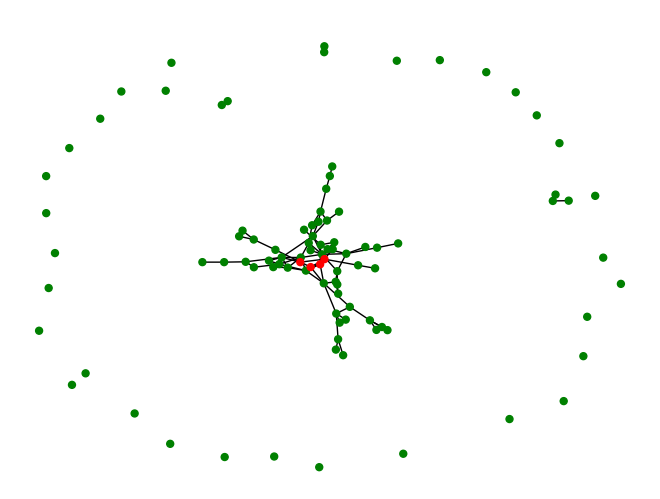

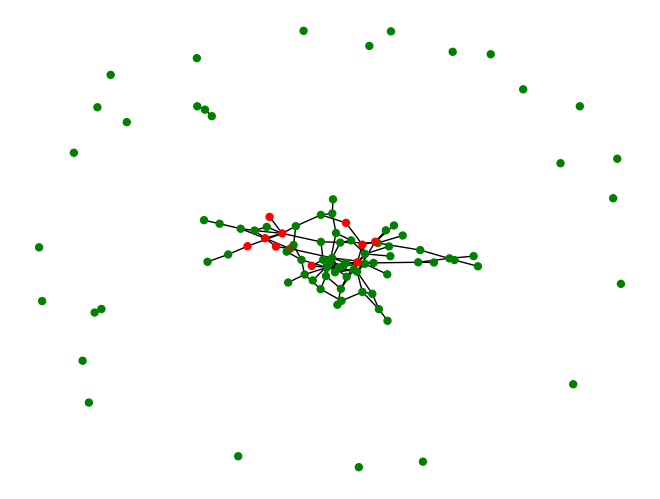

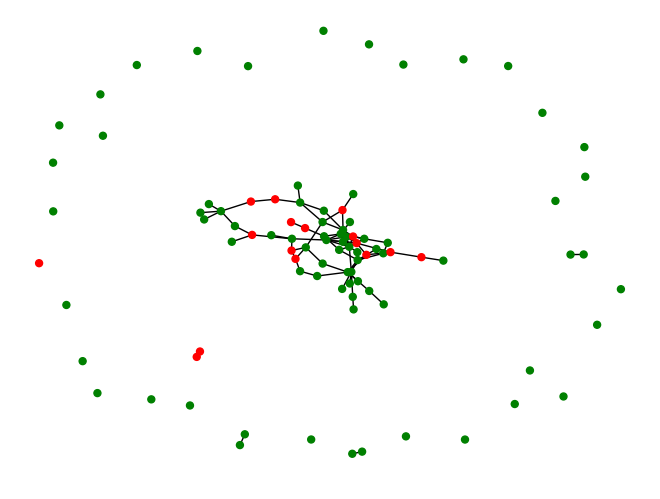

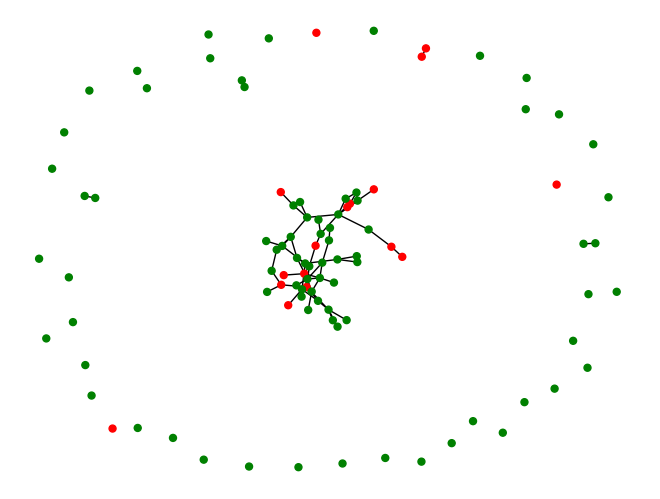

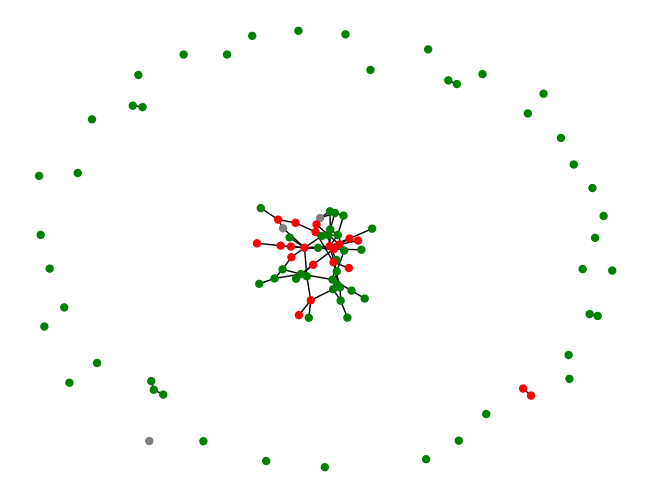

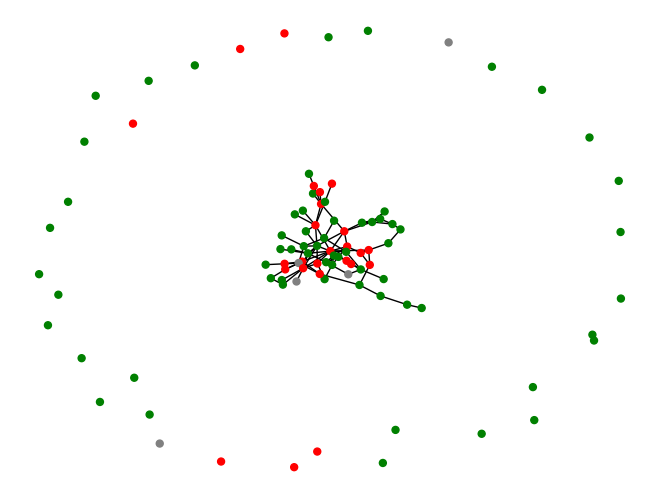

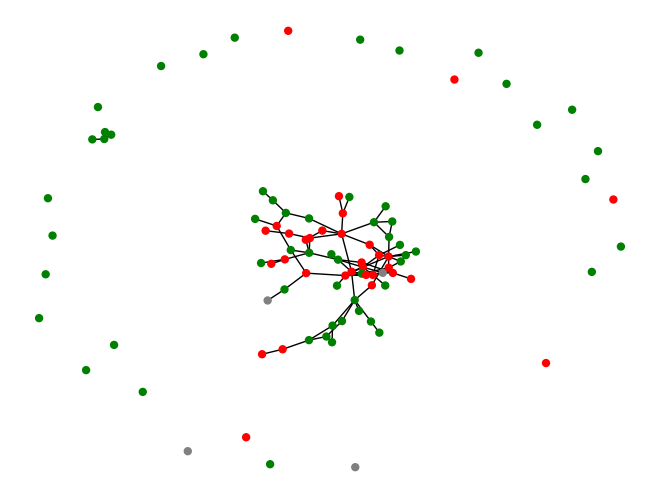

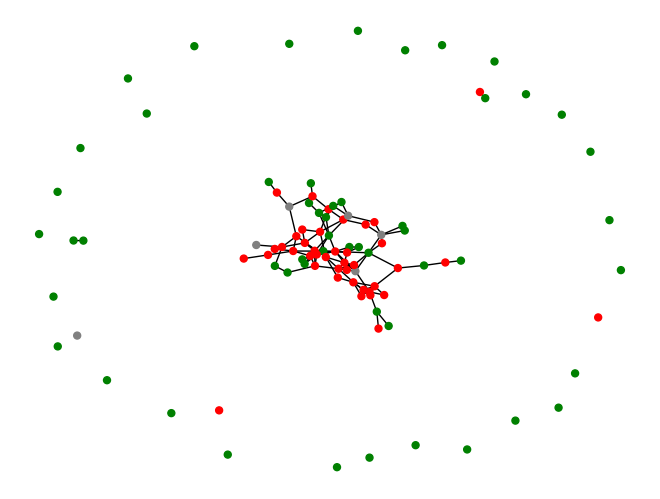

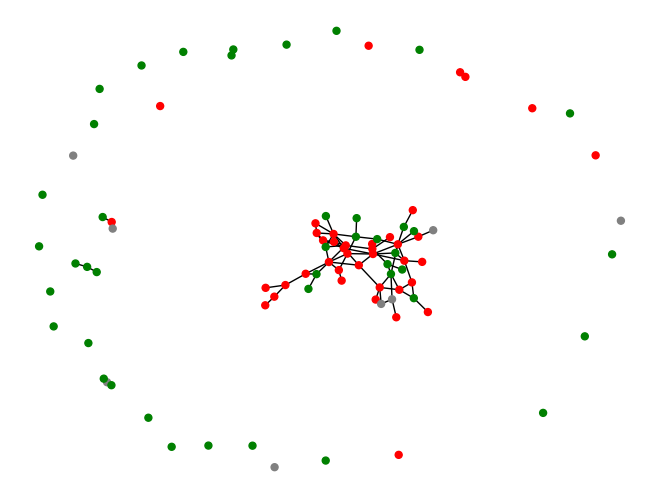

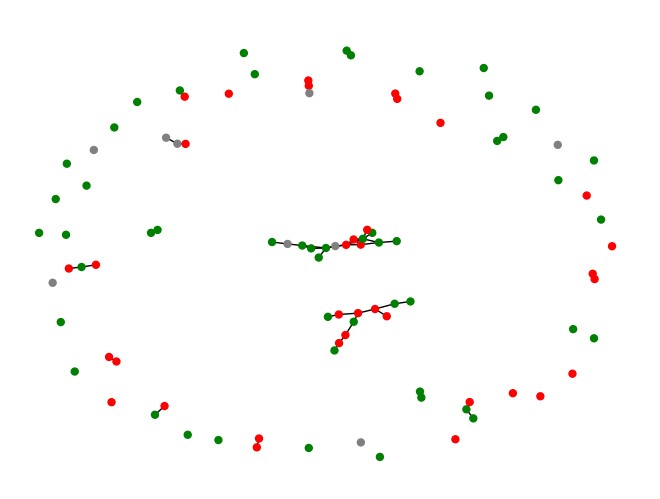

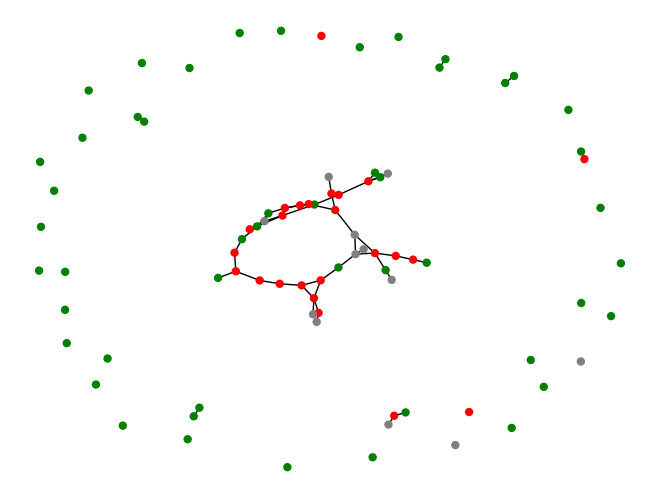

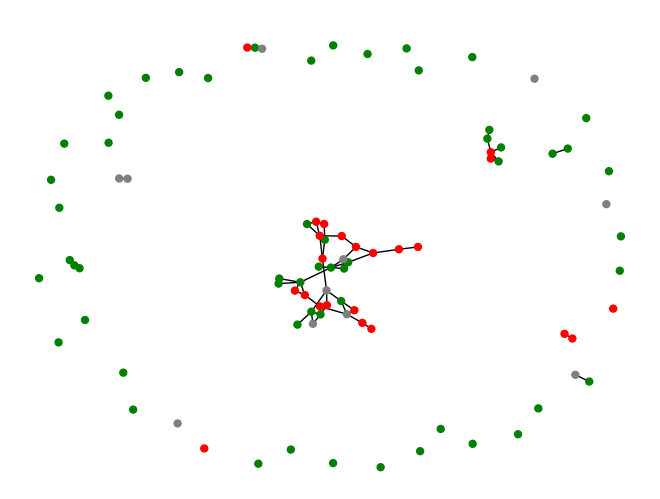

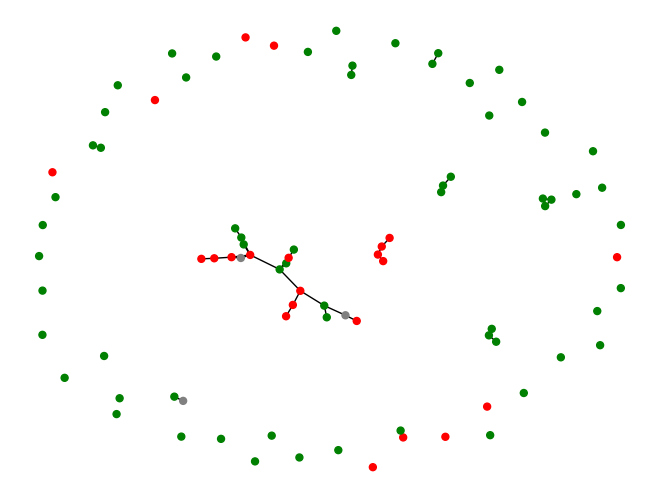

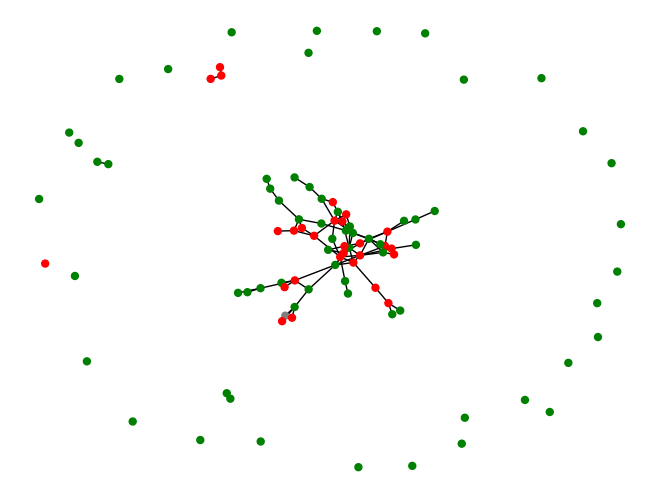

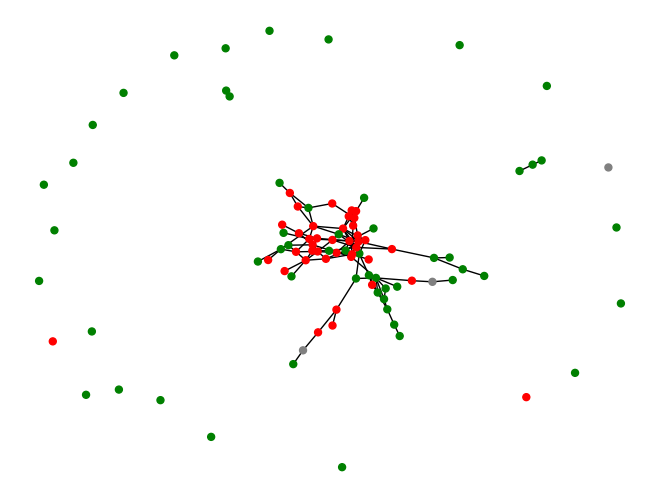

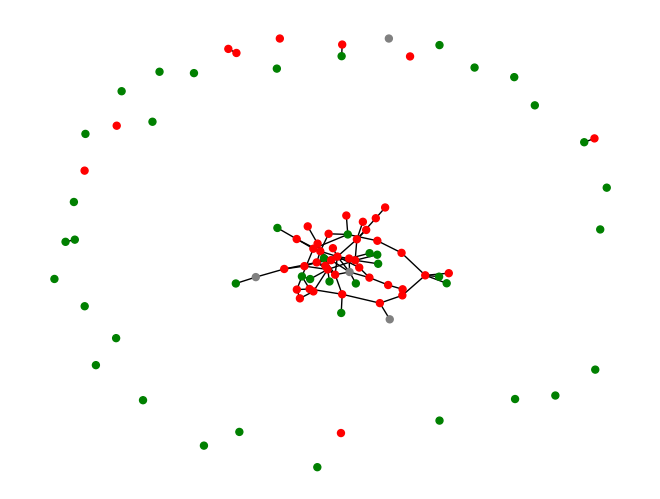

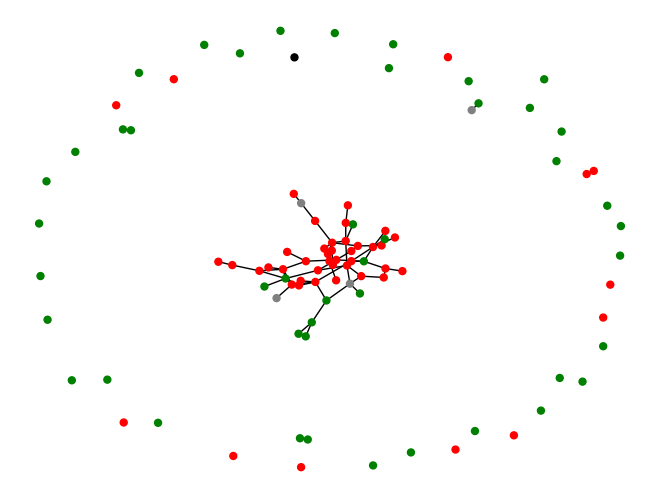

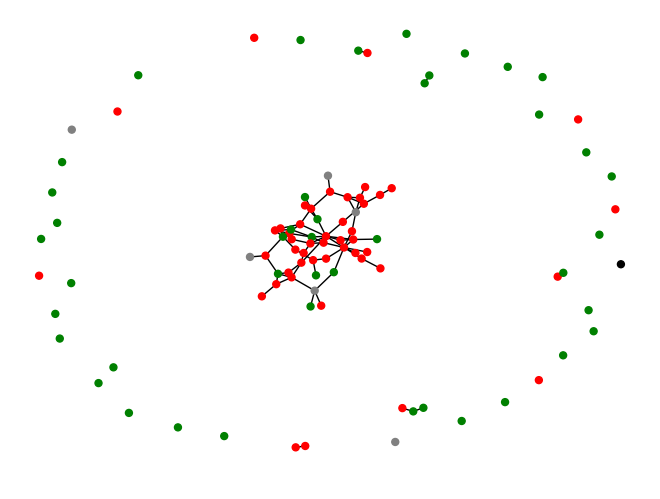

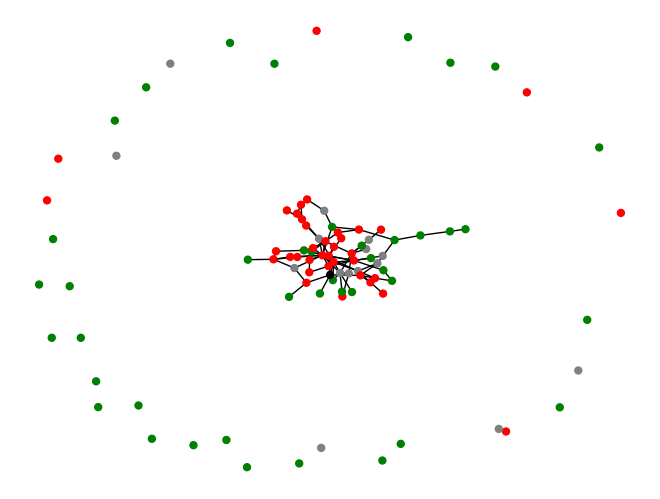

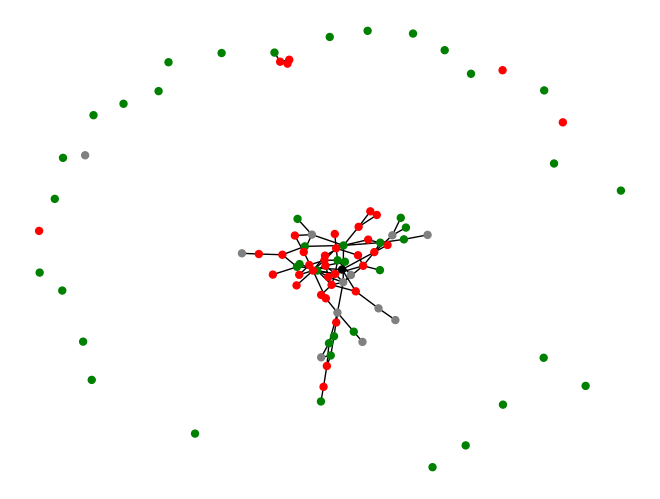

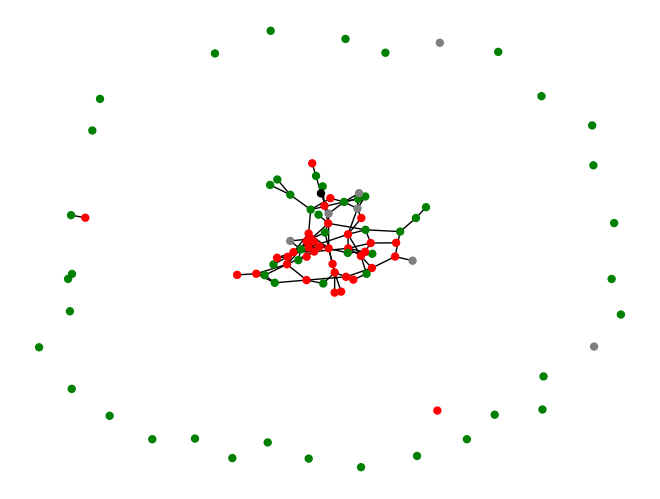

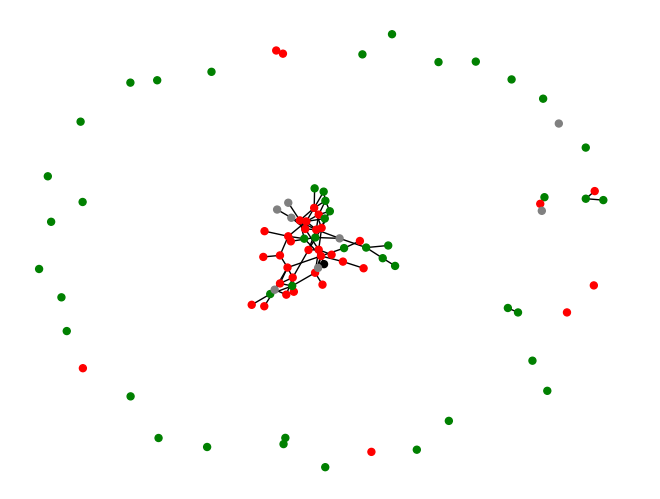

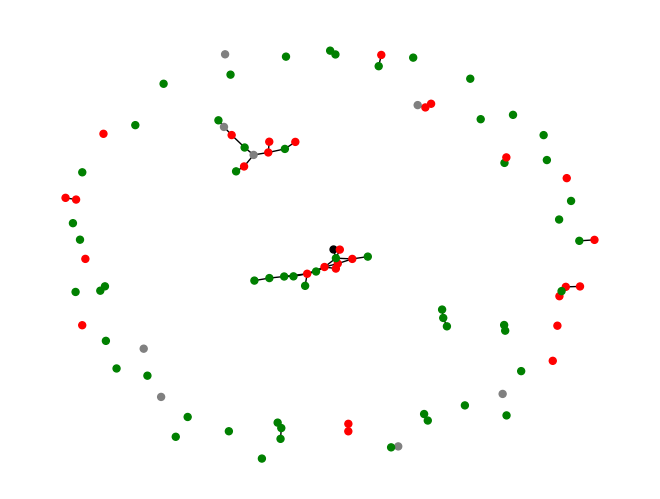

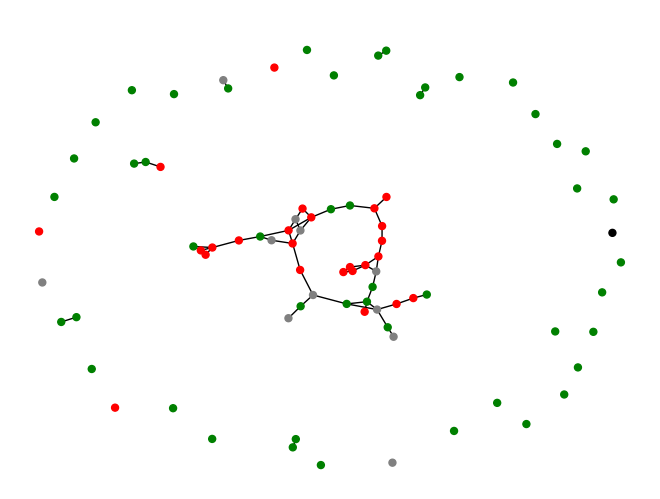

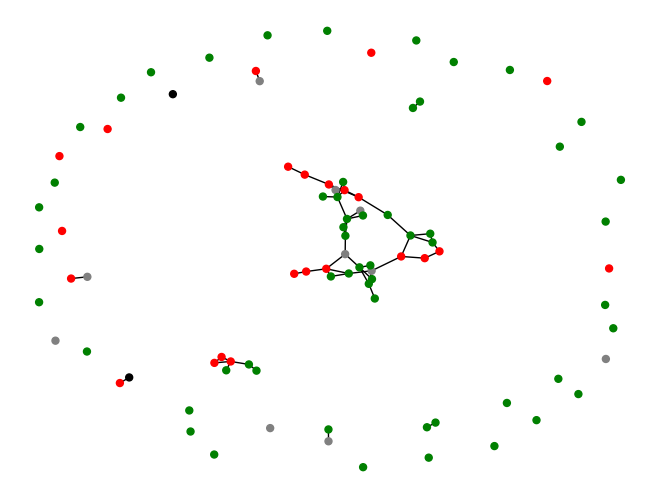

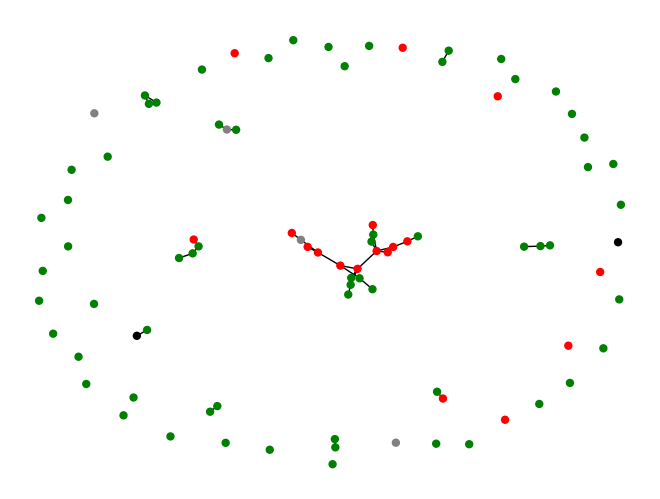

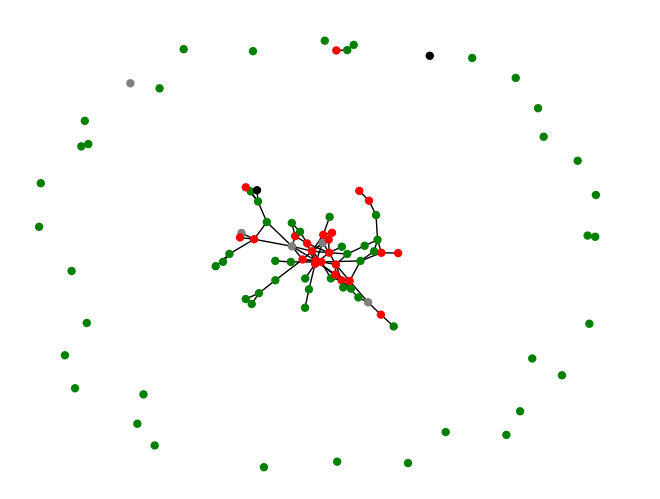

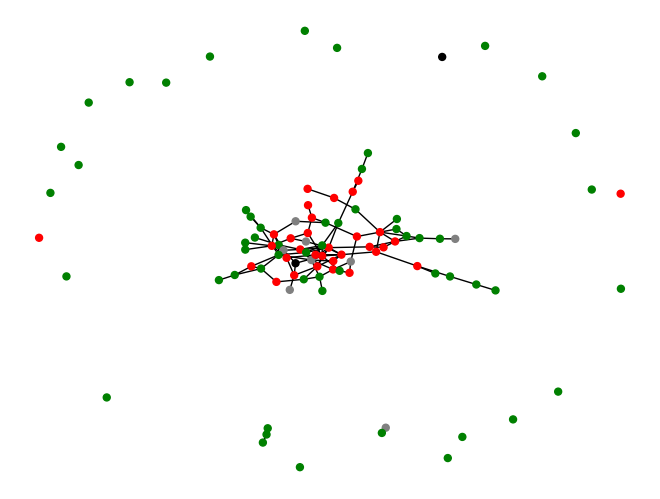

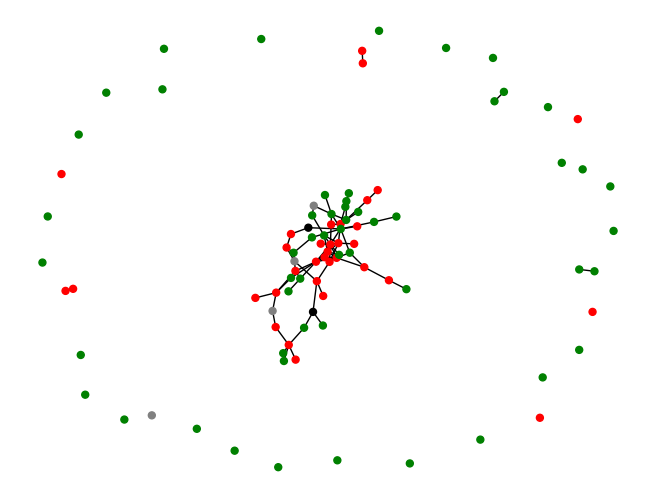

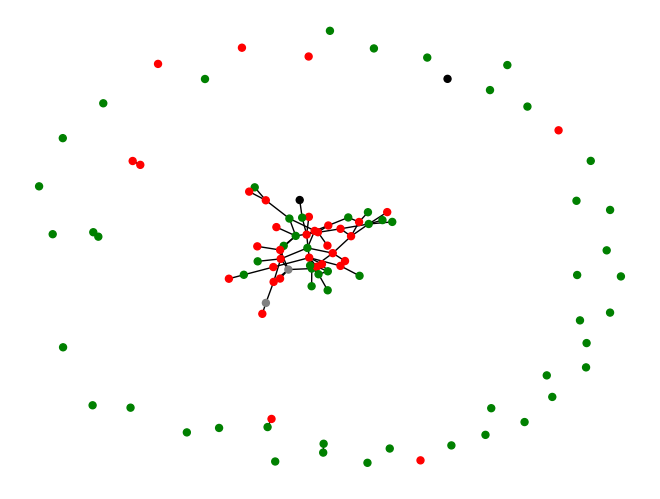

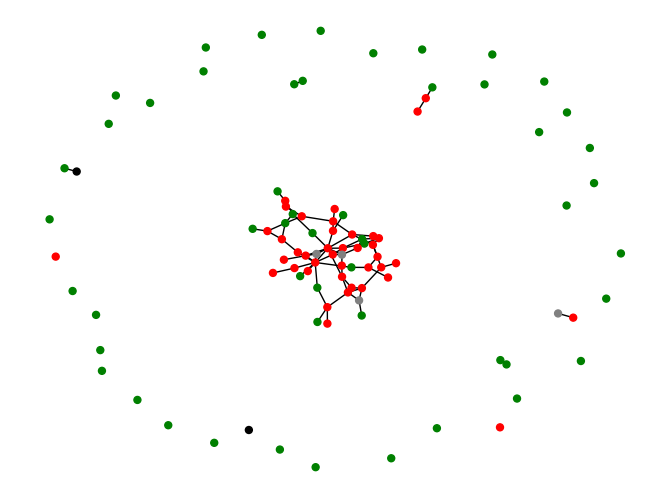

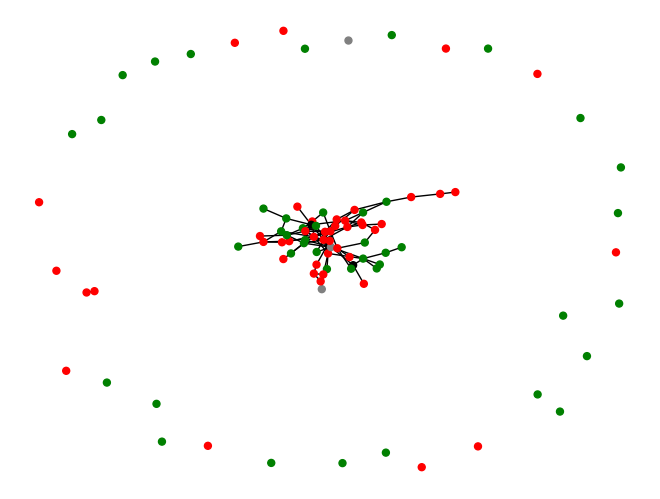

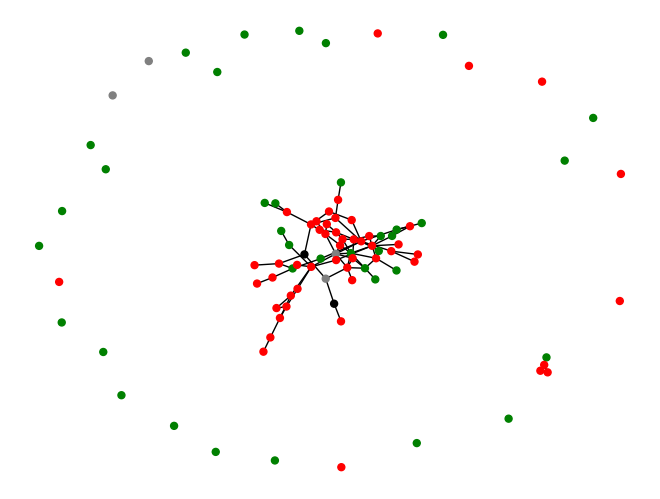

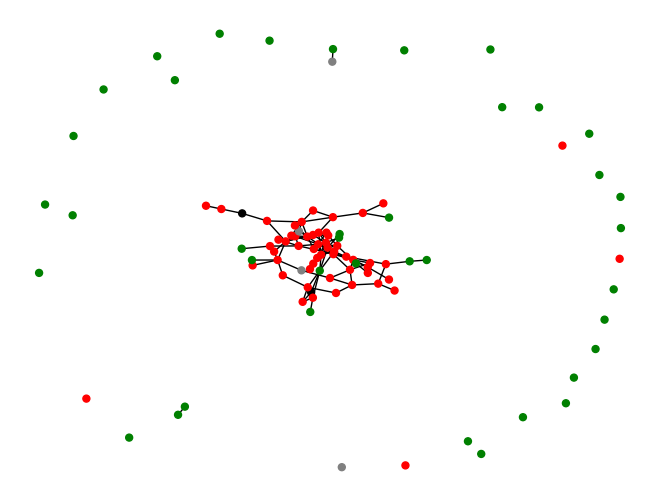

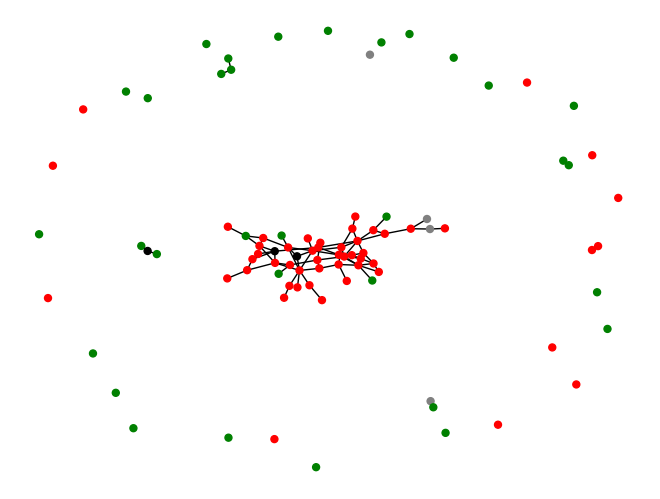

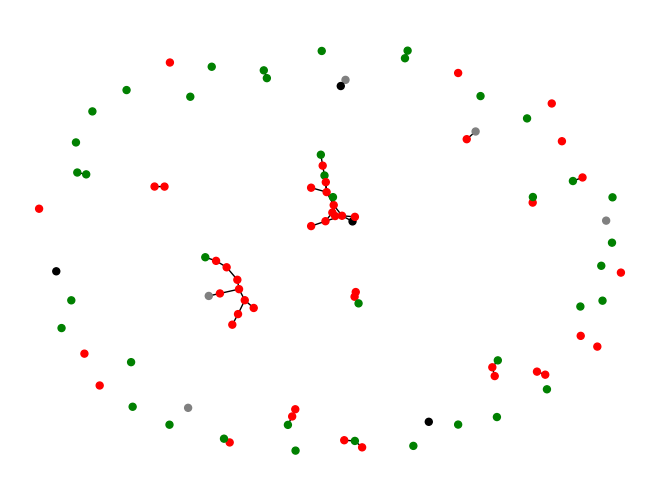

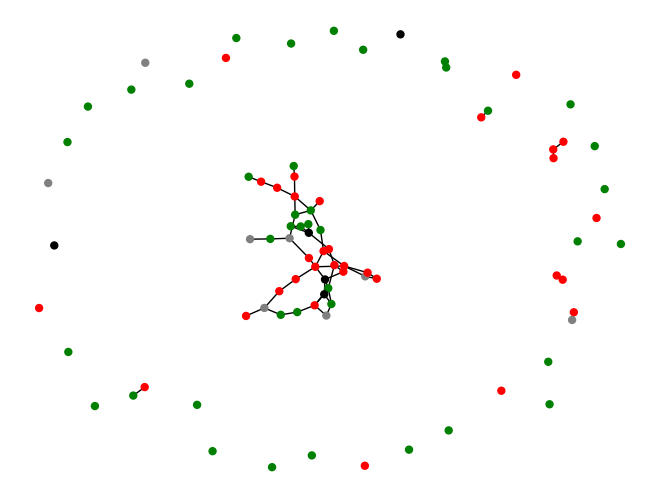

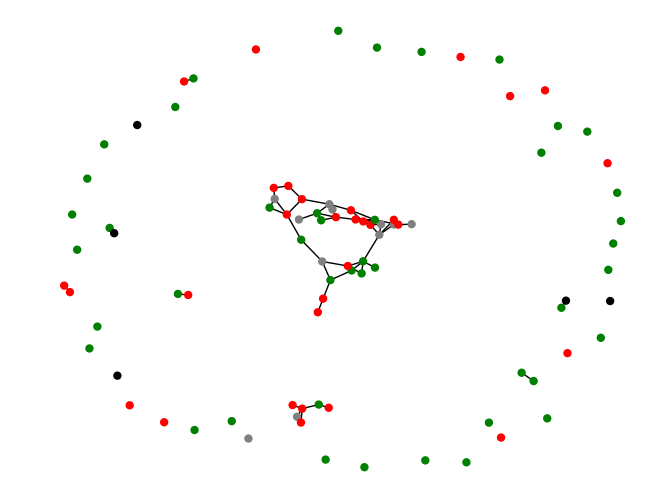

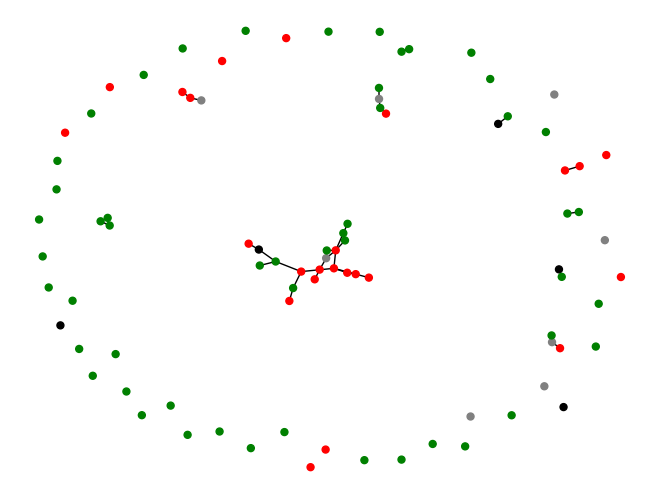

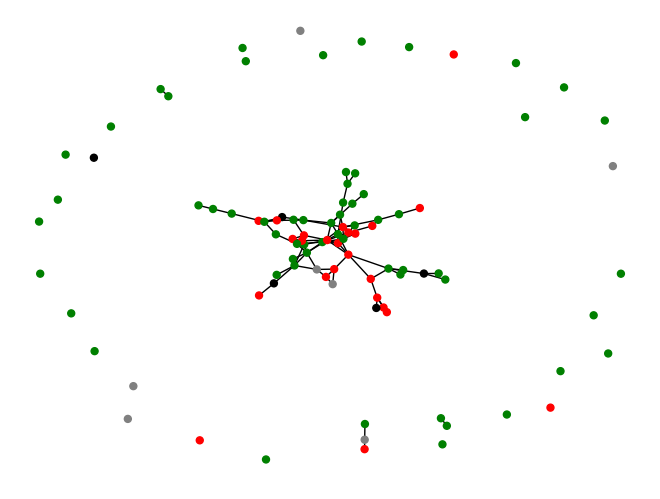

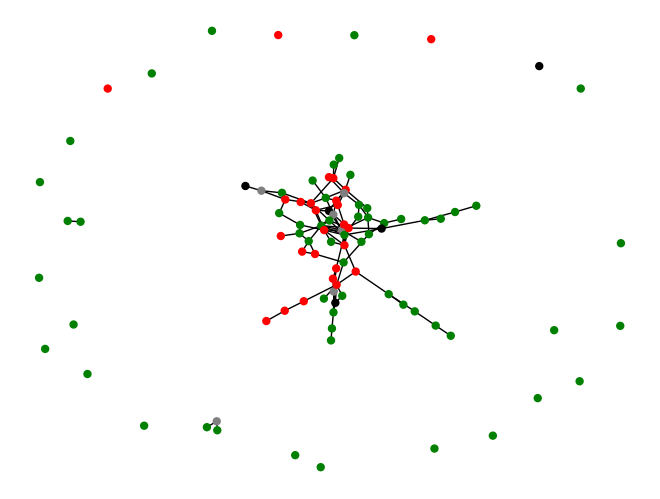

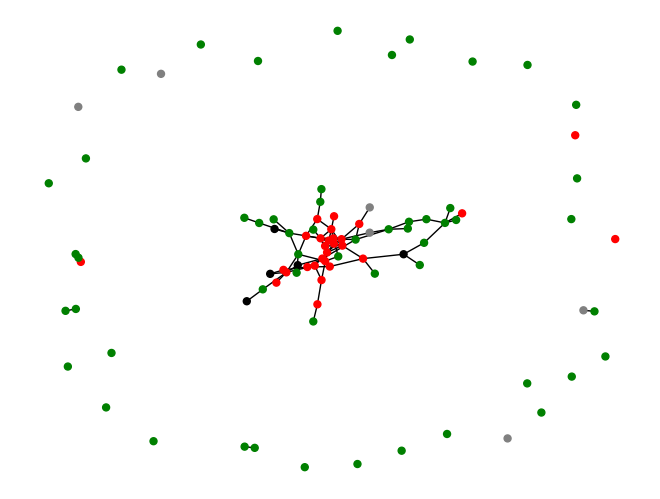

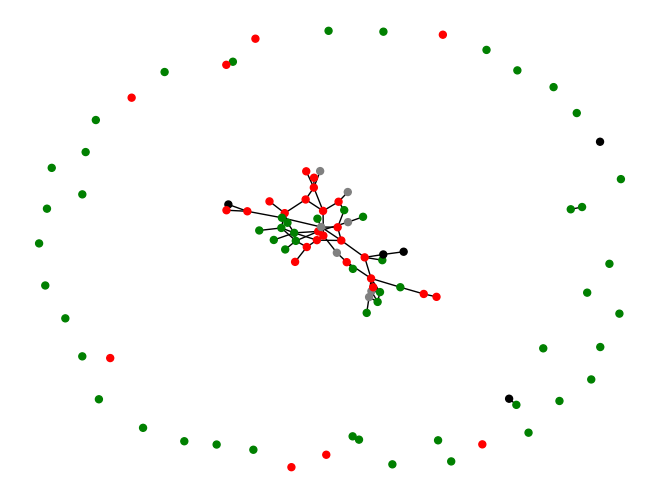

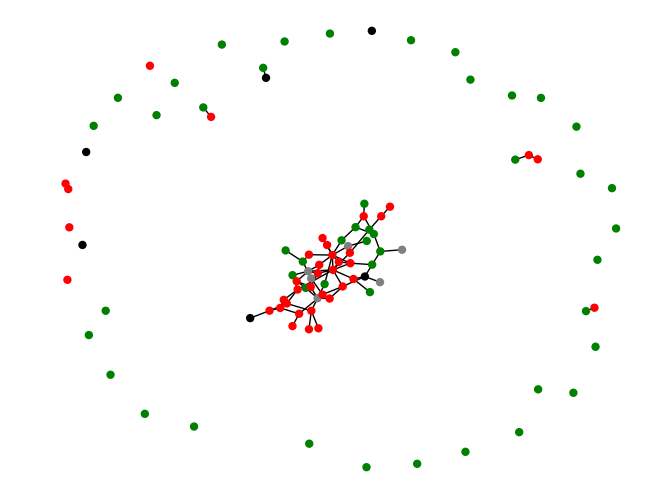

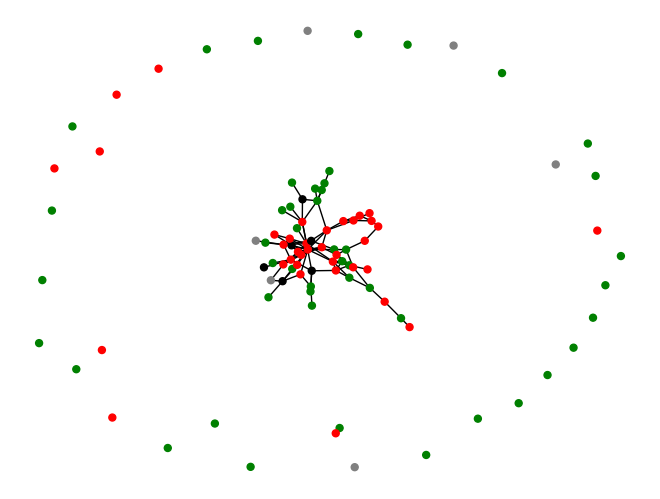

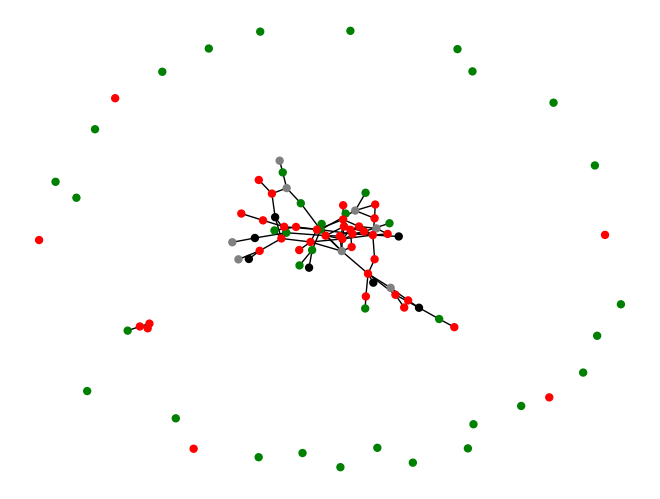

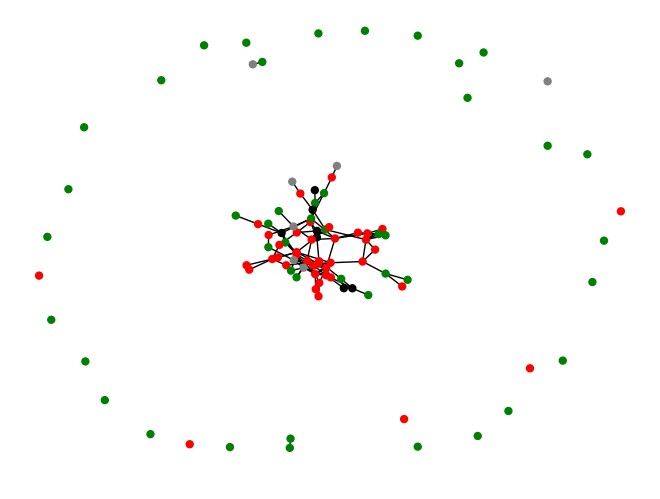

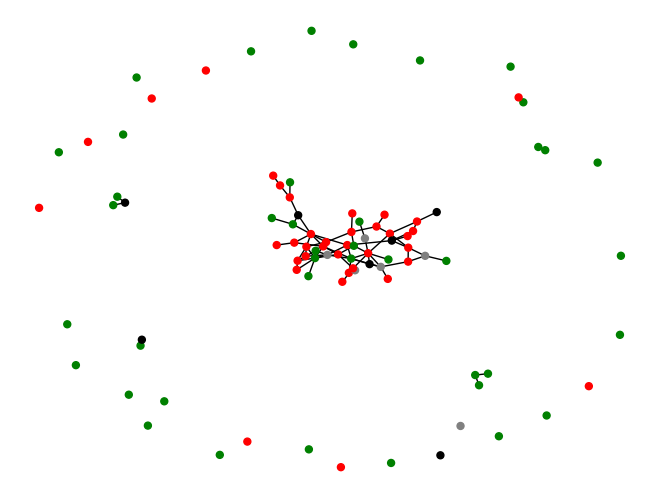

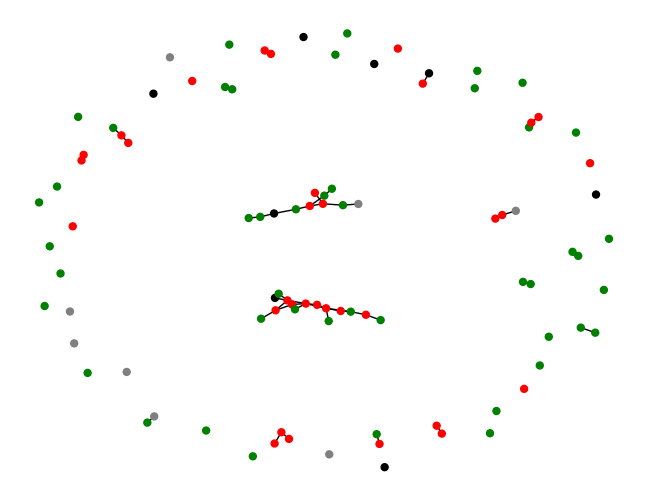

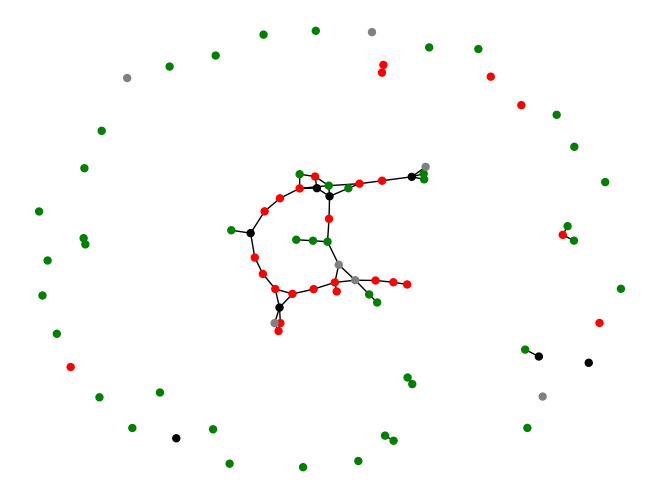

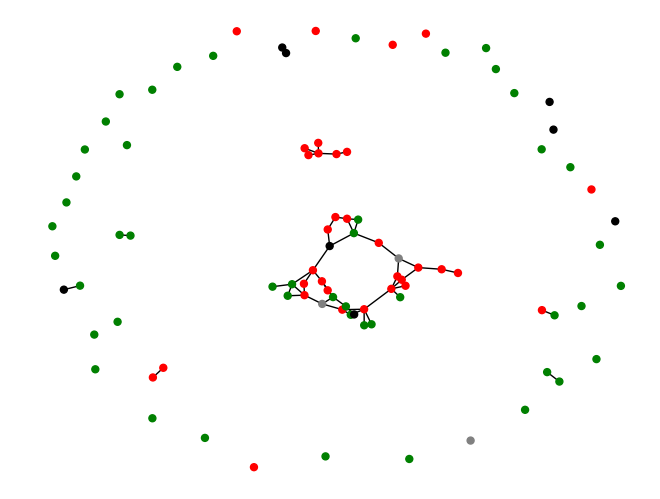

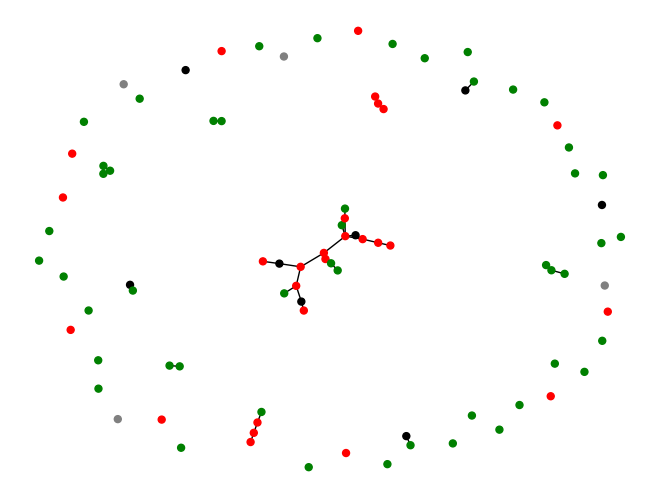

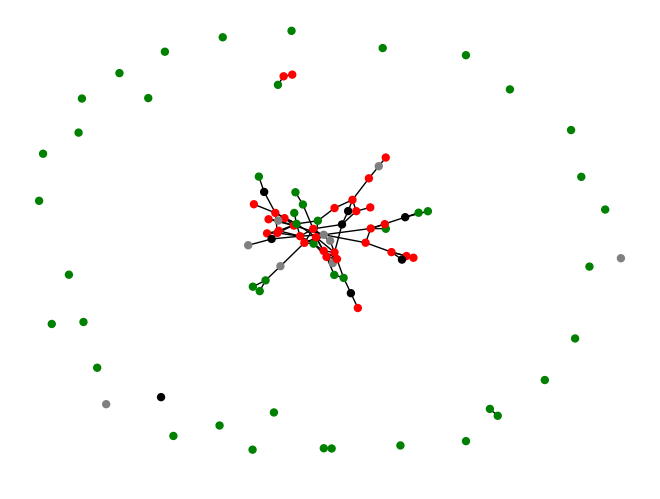

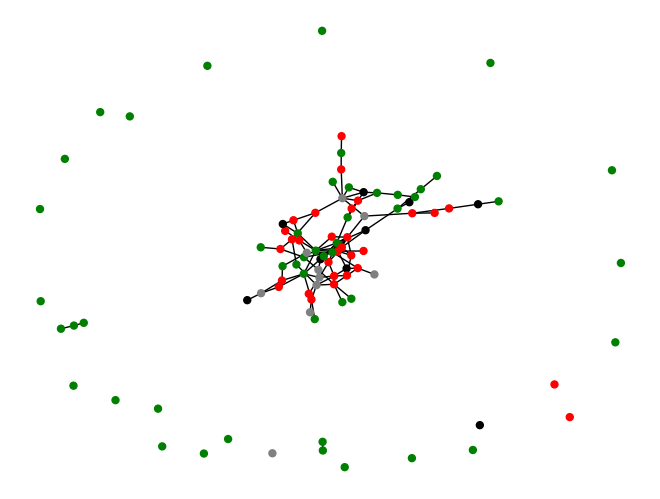

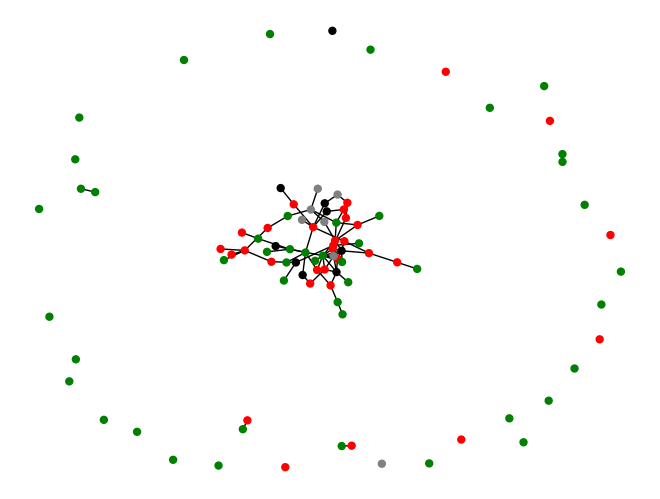

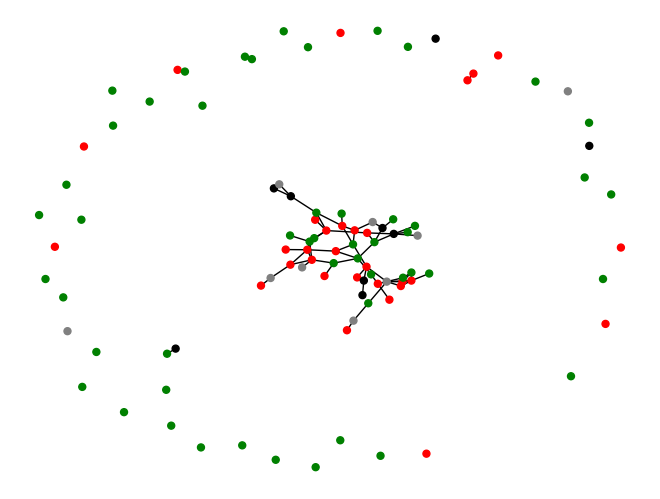

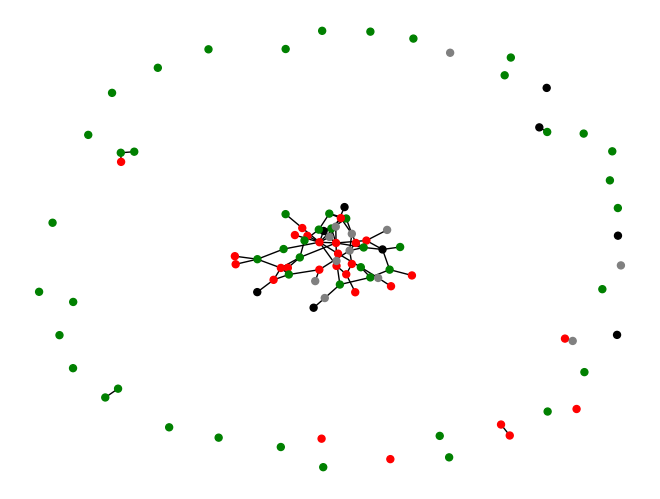

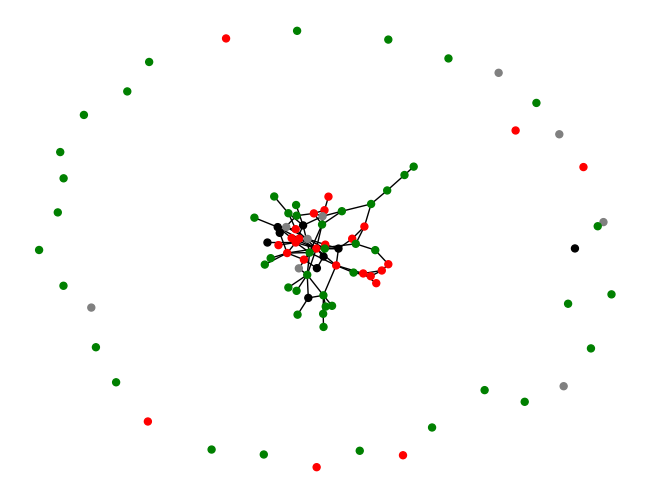

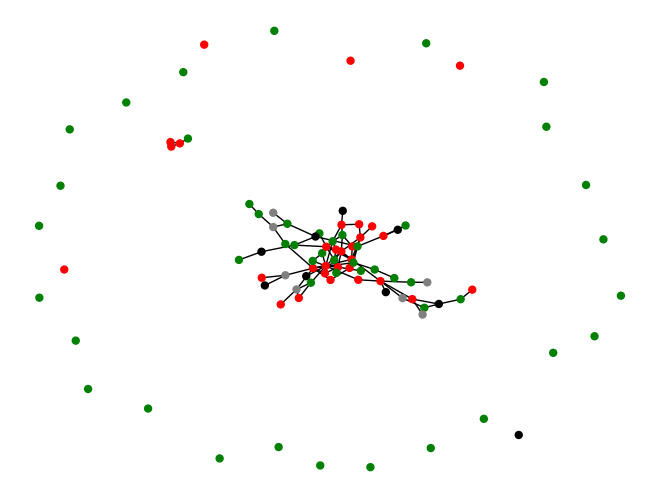

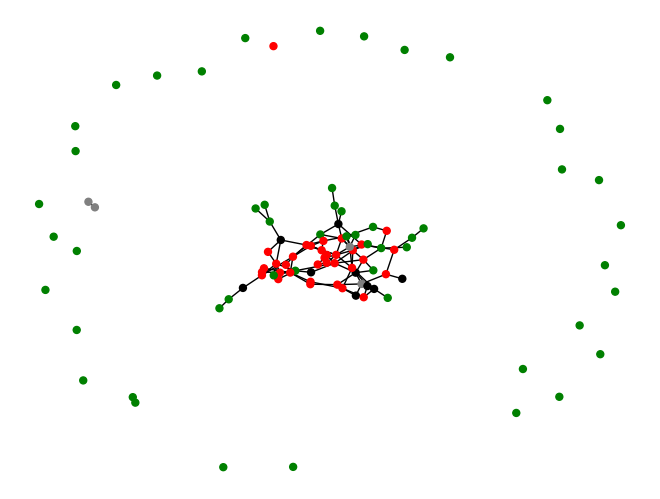

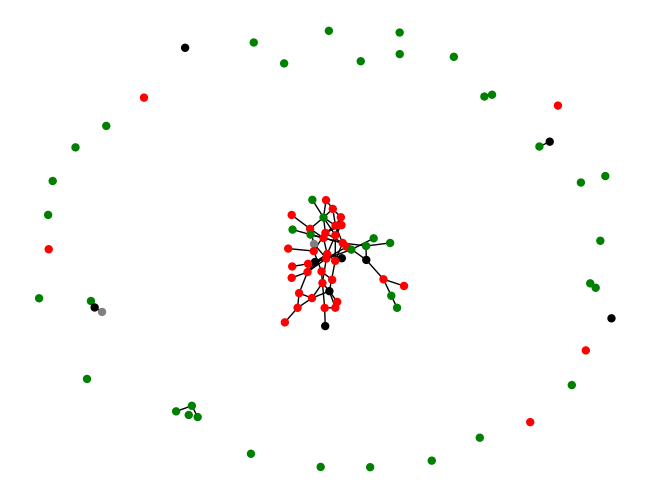

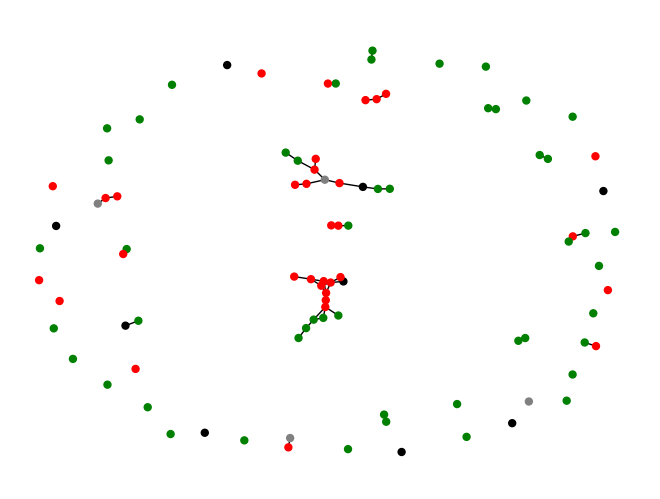

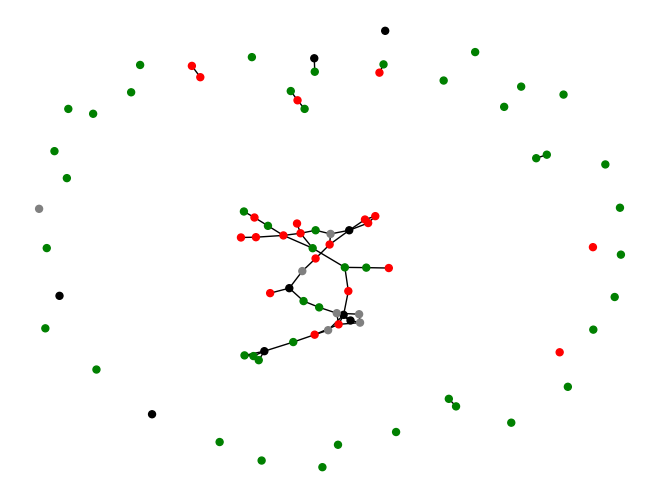

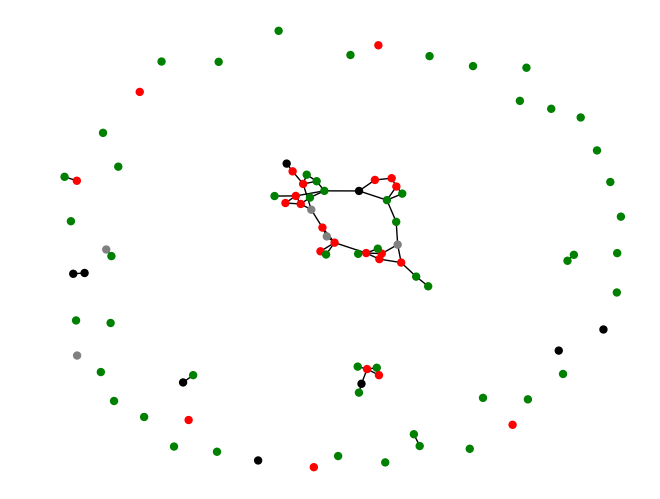

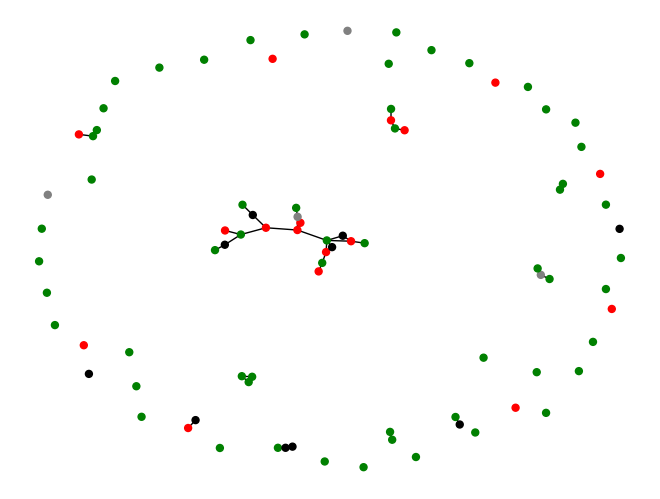

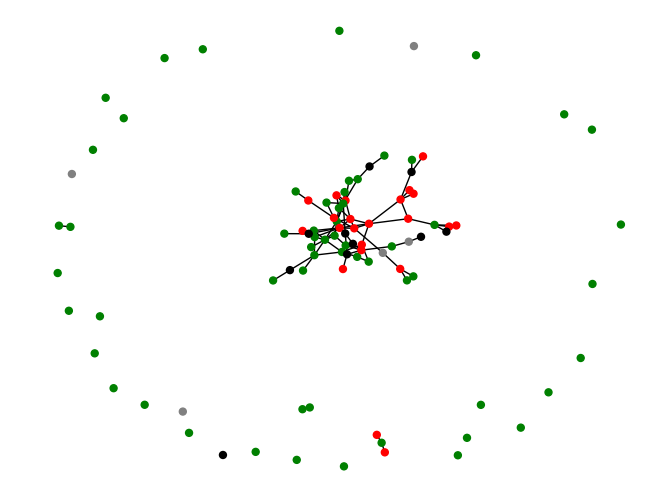

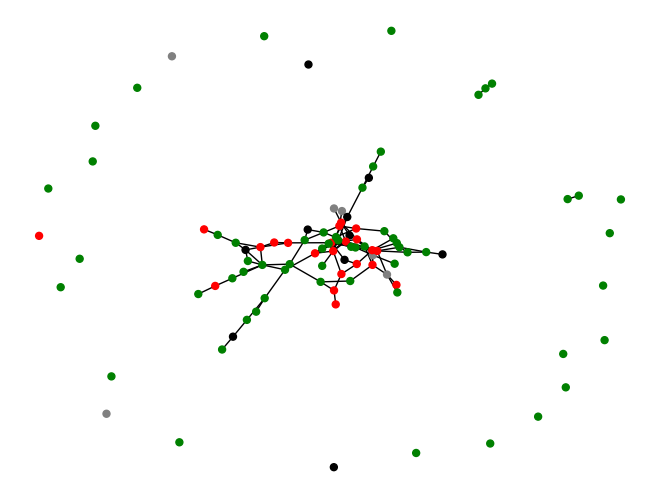

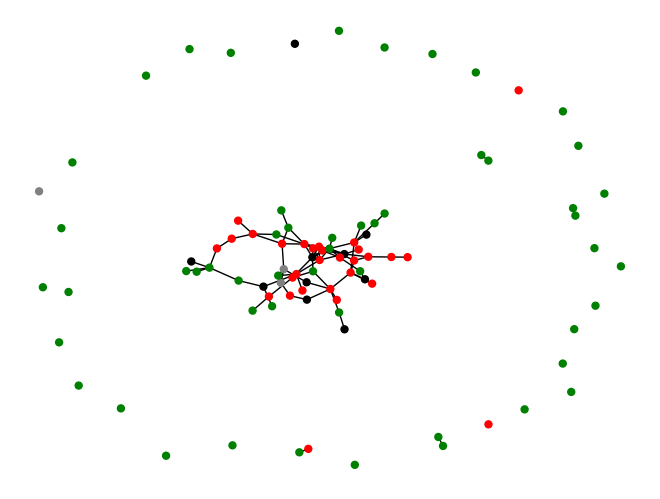

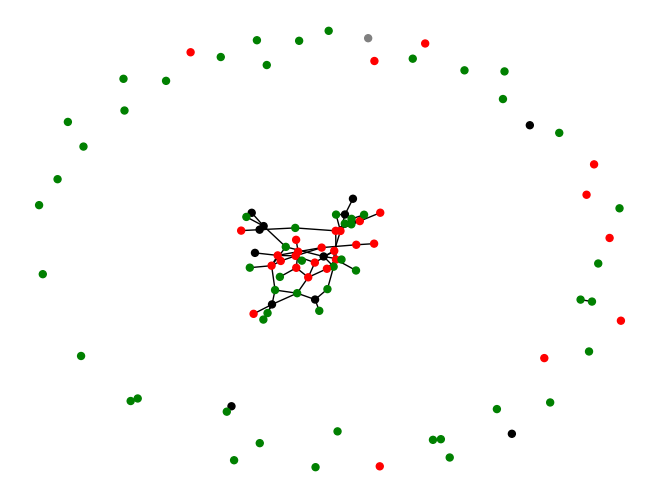

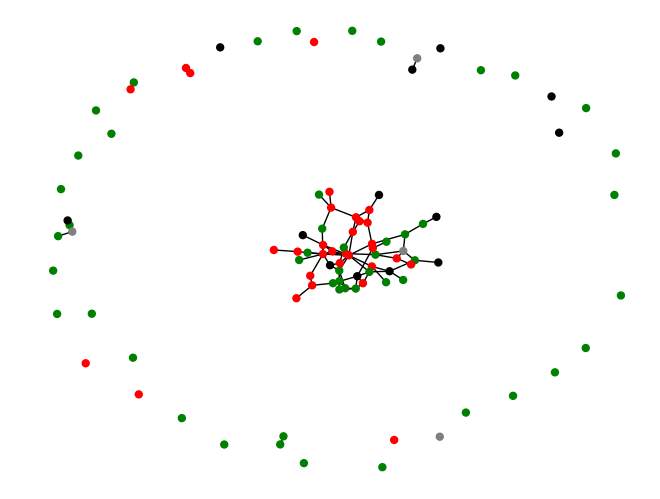

In [83]:
draw_disease_nets(disease_net)